In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
def f(x: int) -> int:
    return 1 / (1 + 25 * x**2)

In [3]:
trainData_x = np.random.uniform(-1, 1, 800).reshape(-1, 1)
trainData_y = f(trainData_x)
validData_x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
validData_y = f(validData_x)
testData_x = np.random.uniform(-1, 1, 100).reshape(-1, 1)
testData_y = f(testData_x)

trainData_x_t = torch.tensor(trainData_x, dtype=torch.float32)
trainData_y_t = torch.tensor(trainData_y, dtype=torch.float32)
validData_x_t = torch.tensor(validData_x, dtype=torch.float32)
validData_y_t = torch.tensor(validData_y, dtype=torch.float32)
testData_x_t = torch.tensor(testData_x, dtype=torch.float32)
testData_y_t = torch.tensor(testData_y, dtype=torch.float32)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.hidden(x)

Epoch 0, trainLoss = 0.097785, validLoss = 0.118632
Epoch 50, trainLoss = 0.043050, validLoss = 0.059072
Epoch 100, trainLoss = 0.016479, validLoss = 0.022177
Epoch 150, trainLoss = 0.002351, validLoss = 0.003395
Epoch 200, trainLoss = 0.000290, validLoss = 0.000283
Epoch 250, trainLoss = 0.000214, validLoss = 0.000208
Epoch 300, trainLoss = 0.000161, validLoss = 0.000155
Epoch 350, trainLoss = 0.000120, validLoss = 0.000115
Epoch 400, trainLoss = 0.000088, validLoss = 0.000085
Epoch 450, trainLoss = 0.000064, validLoss = 0.000062
Epoch 500, trainLoss = 0.000046, validLoss = 0.000045
Epoch 550, trainLoss = 0.000033, validLoss = 0.000033
Epoch 600, trainLoss = 0.000024, validLoss = 0.000024
Epoch 650, trainLoss = 0.000019, validLoss = 0.000019
Epoch 700, trainLoss = 0.000015, validLoss = 0.000015
Epoch 750, trainLoss = 0.000013, validLoss = 0.000013
Epoch 800, trainLoss = 0.000011, validLoss = 0.000011
Epoch 850, trainLoss = 0.000010, validLoss = 0.000010
Epoch 900, trainLoss = 0.000009

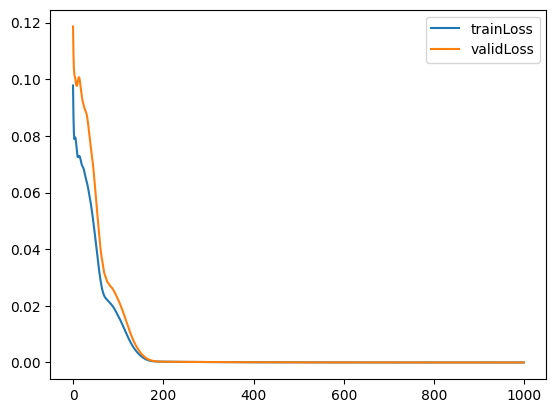

In [5]:
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

trainEpoch = 1000
epochlist = [i for i in range(1000)]
trainlosslist = []
validlosslist = []

for epoch in range(trainEpoch):
    optimizer.zero_grad()
    y_pred = net(trainData_x_t)
    trainloss = criterion(y_pred, trainData_y_t)
    trainloss.backward()
    optimizer.step()

    y_valid = net(validData_x_t)
    validloss = criterion(y_valid, validData_y_t)

    trainlosslist.append(trainloss.item())
    validlosslist.append(validloss.item())
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, trainLoss = {trainloss.item():.6f}, validLoss = {validloss.item():.6f}")

print(f"Train Ending, final loss = {trainlosslist[-1]:.6f}")
plt.plot(epochlist, trainlosslist, label='trainLoss')
plt.plot(epochlist, validlosslist, label='validLoss')
plt.legend()
plt.show()

Loss: 0.000008


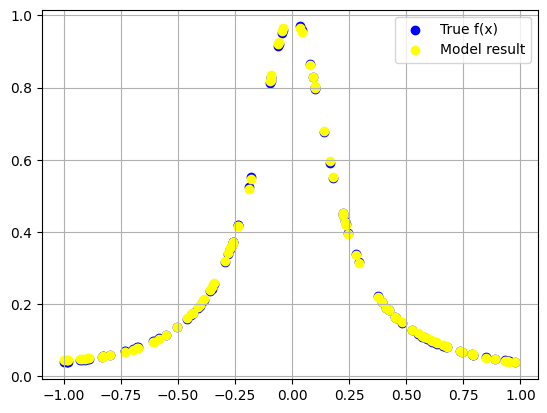

In [8]:
y_pred_t = net(testData_x_t)
y_pred = y_pred_t.detach().numpy()
loss = criterion(y_pred_t, testData_y_t)

print(f"Loss: {loss:.6f}")

plt.scatter(testData_x, testData_y, color='blue', label='True f(x)')
plt.scatter(testData_x, y_pred, color='yellow', label='Model result')
plt.legend()
plt.grid(True)
plt.show()